In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
#define source of training data and the start and end dates
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL','yahoo', start, end)
df.head() #check if data is scrapped sccuessfully

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562591
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.573935
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.469369
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.457407
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.500339


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.129517
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.520905
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.493759
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.918083
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.443558


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562591
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.573935
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.469369
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.457407
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.500339


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


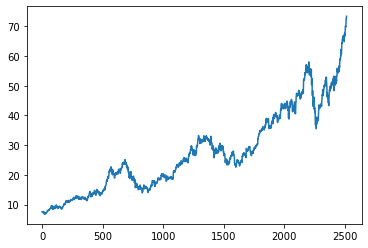

In [6]:
#plot the closing data from screapped data, visualization
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0
...,...,...,...,...,...
2511,71.222504,70.730003,71.172501,71.067497,48478800.0
2512,72.495003,71.175003,71.205002,72.477501,93121200.0
2513,73.492500,72.029999,72.779999,72.449997,146266000.0
2514,73.172501,71.305000,72.364998,72.879997,144114400.0


In [8]:
#define the moving average
ma100 = df.Close.rolling(100).mean()

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
2515    60.331875
Name: Close, Length: 2516, dtype: float64

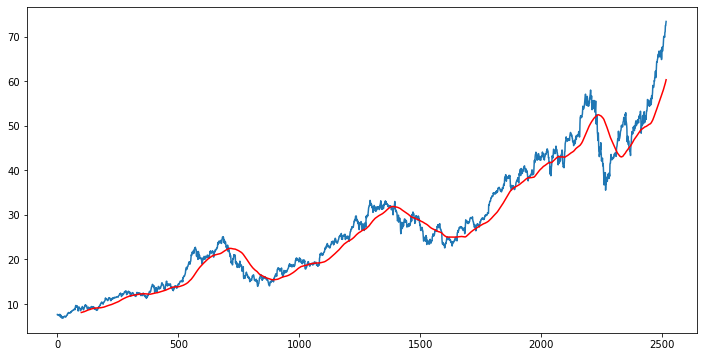

In [9]:
#plot the close data and the moving average in one graph
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
df.shape

(2516, 5)

In [11]:
#splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [12]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [13]:
data_testing.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [14]:
#scale training data for efficiency, downscale to range 0-1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
#fitting the scaled data to the training array
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.85089656],
       [0.84616011],
       [0.84587593]])

In [16]:
data_training_array.shape

(1761, 1)

In [17]:
#to plot the graph, fit training data into x and y
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
# ML Model

In [19]:
#import from keras for deep learning
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
#load the model with training data
model= Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM (units = 60, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.3))

model.add(LSTM (units = 80, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.4))

model.add(LSTM (units = 120, activation = 'relu',))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [22]:
#defining the optimizer and the loss functions for compiling the model from tensorflow
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [23]:
#separate training data into distinct sets
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 62s 519ms/step - loss: 0.0655
Epoch 2/50
52/52 [==============================] - 28s 529ms/step - loss: 0.0105
Epoch 3/50
52/52 [==============================] - 48s 933ms/step - loss: 0.0098
Epoch 4/50
52/52 [==============================] - 79s 2s/step - loss: 0.0086
Epoch 5/50
52/52 [==============================] - 78s 1s/step - loss: 0.0091
Epoch 6/50
52/52 [==============================] - 88s 2s/step - loss: 0.0089
Epoch 7/50
52/52 [==============================] - 78s 1s/step - loss: 0.0078
Epoch 8/50
52/52 [==============================] - 90s 2s/step - loss: 0.0077
Epoch 9/50
52/52 [==============================] - 77s 1s/step - loss: 0.0076
Epoch 10/50
52/52 [==============================] - 74s 1s/step - loss: 0.0072
Epoch 11/50
52/52 [==============================] - 78s 1s/step - loss: 0.0064
Epoch 12/50
52/52 [==============================] - 94s 2s/step - loss: 0.0069
Epoch 13/50
52/52 [=====================

In [24]:
#saving the trained model
model.save('keras_model.h5')

In [25]:
data_testing.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [26]:
#define the period for testing
past_100_days = data_training.tail(100)

In [27]:
#append the data
final_df = past_100_days.append(data_testing, ignore_index = True)

In [28]:
final_df.head()

,Close
0,27.202499
1,27.000000
2,26.982500
3,27.045000
4,27.370001


In [29]:
input_data =  scaler.fit_transform(final_df)
input_data

array([[0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.07269581],
       [0.076

In [30]:
input_data.shape

(855, 1)

In [34]:
#define x and y for fitting onto graph
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [35]:
#convert test data to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)
print (x_test.shape)
print (y_test.shape)

(755, 100, 1)
(755,)


In [36]:
#making predictions

y_predicted = model.predict(x_test)

In [37]:
y_predicted.shape

(755, 1)

In [38]:
scaler.scale_

array([0.02099517])

In [39]:
#upscale the test data by scale factor at index 0
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

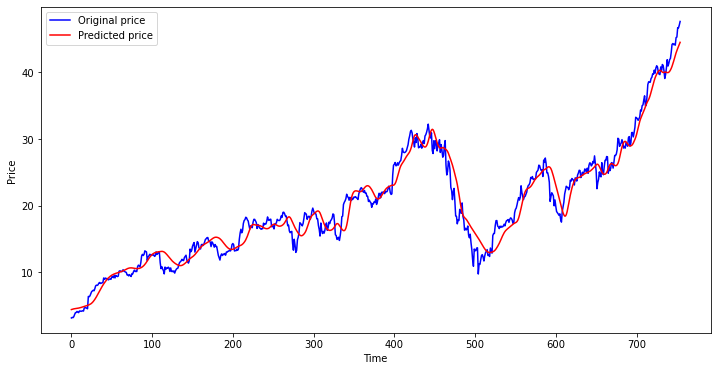

In [41]:
#plotting original vs predicted results results
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label='Original price')
plt.plot(y_predicted, 'r', label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()